# 01 Importing Libraries


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing Data

In [2]:
# Importing most merged dataset

ords_prods_custs_merged_2 = pd.read_csv('/content/drive/MyDrive/Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_custs_merged_2.csv')

In [4]:
# Checking shape

ords_prods_custs_merged_2.shape

(32404859, 29)

In [5]:
# Checking headers

ords_prods_custs_merged_2.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,...,_merge,gender,state,age,date_joined,number_of_dependants,fam_status,income,max_order,loyalty_flag
0,0,0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,3139998,...,both,Male,Minnesota,81,8/1/2019,1,married,49620,32,Regular Customer


In [6]:
ords_prods_custs_merged_2['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [7]:
# Creating a list of region values using if-statement with for-loops

region = []

for value in ords_prods_custs_merged_2['state']:
  if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
    region.append('Northeast')
  elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Minnesota', 'Iowa', 'Missouri']):
    region.append('Midwest')
  elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
    region.append('South')
  else:
    region.append('West')

In [8]:
# Creating new 'region' column within df, using 'region' values
ords_prods_custs_merged_2['region'] = region

In [9]:
# Creating new column in df for average price of products

ords_prods_custs_merged_2['avg_order_cost_by_cust'] = ords_prods_custs_merged_2.groupby(['user_id'])['prices'].transform('mean')

In [10]:
# Creating spender flag: low spender - less than 10

ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['avg_order_cost_by_cust'] < 10, 'spender_flag'] = 'Low spender'

In [11]:
# Creating spender flag: High spender - higher than or equal to 10

ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['avg_order_cost_by_cust'] >= 10, 'spender_flag'] = 'High spender'

In [12]:
crosstab = pd.crosstab(ords_prods_custs_merged_2['region'], ords_prods_custs_merged_2['spender_flag'], dropna = False)

In [13]:
# Creating low-activity flag - customers w/ less than 5 orders

ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [14]:
# Creating low-activity flag - customers w/ more than 5 orders

ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['max_order'] >= 5, 'activity_flag'] = 'Normal activity'

In [15]:
# Classifying age groups using the if-statement w/ for-loops

generation = []

for value in ords_prods_custs_merged_2['age']:
  if (value >=18) and (value <=25):
    generation.append('Gen Z 18-25')
  elif (value >=26) and (value <=41):
    generation.append('Millennials 26-41')
  elif (value >=42) and (value <=57):
    generation.append('Gen X 42-57')
  elif (value >=58) and (value<=76):
    generation.append('Baby Boomers 58-76')
  else:
    generation.append('Silent Generation >76')
  

In [16]:
# Adding 'generation' column with results from generation list

ords_prods_custs_merged_2['generation'] = generation

In [17]:
# Classifying income groups using if-statement w/ for-loops

income_group = []

for value in ords_prods_custs_merged_2['income']:
  if (value < 32000):
    income_group.append('Lower class <32K')
  elif (value >= 32000) and (value <= 53000):
    income_group.append('Lower-middle class 32K-53K')
  elif (value > 53000) and (value <= 107000):
    income_group.append('Middle class 53K-107K')
  elif (value > 107000) and (value <=374000):
    income_group.append('Upper middle class 107K-374K')
  else:
    income_group.append('Upper class >374K')

In [18]:
# Adding 'income_group' column with results from income_group list

ords_prods_custs_merged_2['income_group'] = income_group

In [19]:
# Checking number of dependants

ords_prods_custs_merged_2['number_of_dependants'].value_counts(dropna = False)

3    8135109
0    8097503
2    8091143
1    8081104
Name: number_of_dependants, dtype: int64

In [20]:
# Classifying customers as parent/non-parent based on 'number_of_depedants' using loc() function

ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['number_of_dependants'] == 0, 'parent_status'] = 'Non-parent'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['number_of_dependants'] >= 1, 'parent_status'] = 'Parent'

In [21]:
# Creating weekday column based on 'orders_day_of_the_week'

ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['order_day_of_week'] == 0, 'weekday'] = 'Saturday'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['order_day_of_week'] == 1, 'weekday'] = 'Sunday'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['order_day_of_week'] == 2, 'weekday'] = 'Monday'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['order_day_of_week'] == 3, 'weekday'] = 'Tuesday'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['order_day_of_week'] == 4, 'weekday'] = 'Wednesday'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['order_day_of_week'] == 5, 'weekday'] = 'Thursday'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['order_day_of_week'] == 6, 'weekday'] = 'Friday'

In [22]:
# Creating department_name column based on department_id

ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 1, 'department_name'] = 'Frozen'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 2, 'department_name'] = 'Other'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 3, 'department_name'] = 'Bakery'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 4, 'department_name'] = 'Produce'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 5, 'department_name'] = 'Alcohol'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 6, 'department_name'] = 'International'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 7, 'department_name'] = 'Beverages'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 8, 'department_name'] = 'Pets'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 9, 'department_name'] = 'Dry goods'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 10, 'department_name'] = 'Bulk'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 11, 'department_name'] = 'Personal care'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 12, 'department_name'] = 'Meat seafood'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 13, 'department_name'] = 'Pantry'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 14, 'department_name'] = 'Breakfast'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 15, 'department_name'] = 'Canned goods'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 16, 'department_name'] = 'Dairy Eggs'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 17, 'department_name'] = 'Household'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 18, 'department_name'] = 'Babies'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 19, 'department_name'] = 'Snacks'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 20, 'department_name'] = 'Deli'
ords_prods_custs_merged_2.loc[ords_prods_custs_merged_2['department_id'] == 21, 'department_name'] = 'Missing'  

In [23]:
# Removing extra column

ords_prods_custs_merged_3 = ords_prods_custs_merged_2.drop(columns = ['Unnamed: 0'])

In [24]:
# Double checking headers

ords_prods_custs_merged_3.head(1)

,Unnamed: 0.1,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,...,loyalty_flag,region,avg_order_cost_by_cust,spender_flag,activity_flag,generation,income_group,parent_status,weekday,department_name
0,0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,3139998,138,...,Regular Customer,Midwest,6.935811,Low spender,Normal activity,Silent Generation >76,Lower-middle class 32K-53K,Parent,Friday,Snacks


In [25]:
# Create an appropriate visualization to show the distribution of profiles

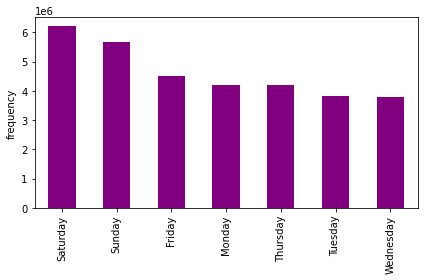

In [26]:
# Creating a bar chart for 'weekday' value counts

bar = ords_prods_custs_merged_3['weekday'].value_counts().plot.bar(color = 'purple')
plt.ylabel('frequency')
plt.tight_layout()

In [27]:
# Exporting bar chart

bar.figure.savefig('weekday_order_freq.png')

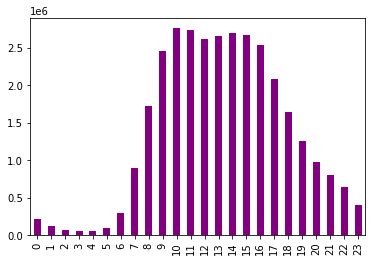

In [28]:
# Creating histogram for 'order_hour_of_day'

bar_2 = ords_prods_custs_merged_3['order_hour_of_day'].value_counts().sort_index().plot.bar(color = 'purple')

In [29]:
# Exporting bar_2

bar_2.figure.savefig('order_hour_freq.png')

In [30]:
# Calculating mean price per day

price_per_day = ords_prods_custs_merged_3.groupby('weekday').agg({'prices': ['mean']})

Text(0, 0.5, 'mean_price')

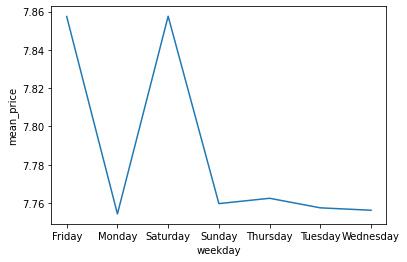

In [31]:
mean_price_per_day = sns.lineplot(data = price_per_day, legend = False)
plt.ylabel('mean_price')

In [32]:
# Exporting price_per_day line graph

mean_price_per_day.figure.savefig('mean_price_per_day.png')

In [33]:
# Are there particular times of the day people spend the most money?

In [34]:
# Calculating mean price per hour

price_per_hour = ords_prods_custs_merged_3.groupby('order_hour_of_day').agg({'prices': ['mean']})

Text(0, 0.5, 'mean_price')

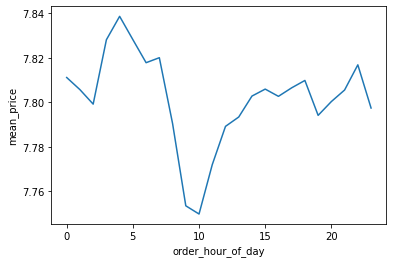

In [35]:
# Creating a line chart for mean price per hour

mean_price_per_hour = sns.lineplot(data = price_per_hour, legend = False)
plt.ylabel('mean_price')

In [36]:
# Exporting mean_price_per_hour line graph

mean_price_per_hour.figure.savefig('mean_price_per_hour.png')

In [37]:
# Is there a way to use simpler price range groupings to help marketing and sales with their efforts?

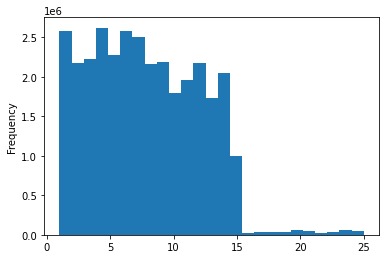

In [38]:
hist = ords_prods_custs_merged_3['prices'].plot.hist(bins = 25)

In [39]:
# Exporting histogram

hist.figure.savefig('prices_histogram.png')

In [40]:
# Are there certain types of products more popular than others?

In [41]:
# Total sales by product name

sales_by_product_name = ords_prods_custs_merged_3.groupby('product_name').agg({'prices' : ['min', 'max', 'sum']})

In [42]:
sales_by_product_name.to_csv('sales_by_product_name.csv')

In [43]:
# Creating list with top 10 best selling products

top_10_products = ['Banana','Bag of Organic Bananas','Large Lemon','Limes','Organic Baby Spinach','Organic Strawberries',
                   'Organic Whole Milk','Cucumber Kirby','Apple Honeycrisp Organic','Organic Cucumber']

In [44]:
# Writing loop to create a flag for top 10 best selling products

top_10 = []

for value in ords_prods_custs_merged_3['product_name']:
  if value in top_10_products:
    top_10.append('Top 10 selling product')
  else:
    top_10.append('Not applicable')

In [45]:
top_10

['Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applicable',
 'Not applic

In [46]:
# Creating new column in df for 'best_seller'

ords_prods_custs_merged_3['best_seller'] = top_10

In [47]:
# Value counts for new column

ords_prods_custs_merged_3['best_seller'].value_counts(dropna = False)

Not applicable            30352324
Top 10 selling product     2052535
Name: best_seller, dtype: int64

In [48]:
# Creating new df with just the top 10 selling products

df_top_10_products = ords_prods_custs_merged_3[ords_prods_custs_merged_3['best_seller'] == 'Top 10 selling product']

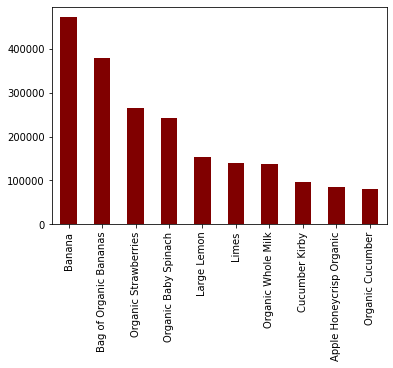

In [49]:
# Creating bar chart for top 10 selling products

bar_3 = df_top_10_products['product_name'].value_counts().plot.bar(color = 'maroon')

In [50]:
# Exporting bar_3

bar_3.figure.savefig('top_10_selling_prods.png')

In [51]:
# Which departments have the highest frequency of product orders?

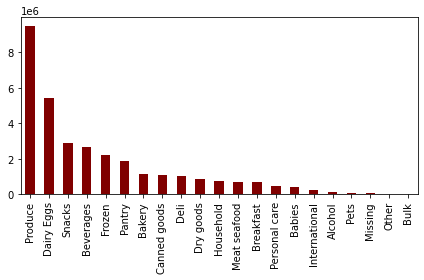

In [52]:
# Creating bar chart to visualizing order frequency by department

bar_4 = ords_prods_custs_merged_3['department_name'].value_counts().plot.bar(color = 'maroon')
plt.tight_layout()

In [53]:
# Exporting bar_4

bar_4.figure.savefig('ord_freq_by_dept.png')

In [54]:
# Double checking headers

pd.set_option('display.max_columns', None)
ords_prods_custs_merged_3.head(1)

,Unnamed: 0.1,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,gender,state,age,date_joined,number_of_dependants,fam_status,income,max_order,loyalty_flag,region,avg_order_cost_by_cust,spender_flag,activity_flag,generation,income_group,parent_status,weekday,department_name,best_seller
0,0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,3139998,138,prior,28,6,11,3.0,False,5,0,both,Male,Minnesota,81,8/1/2019,1,married,49620,32,Regular Customer,Midwest,6.935811,Low spender,Normal activity,Silent Generation >76,Lower-middle class 32K-53K,Parent,Friday,Snacks,Not applicable


Text(0, 0.5, '')

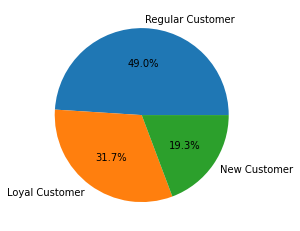

In [55]:
# Showing pie chart of customers based on loyalty status

pie_2 = ords_prods_custs_merged_3['loyalty_flag'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.ylabel('')

In [56]:
# Double checking value counts of 'loyalty_flag'

ords_prods_custs_merged_3['loyalty_flag'].value_counts()

Regular Customer    15876776
Loyal Customer      10284093
New Customer         6243990
Name: loyalty_flag, dtype: int64

In [57]:
# Exporting pie_2

pie_2.figure.savefig('loyalty_flag_pie.png')

In [58]:
# Are there differences in ordering habits based on a customer’s loyalty status?

In [59]:
ords_prods_custs_merged_3['order_frequency_by_cust'] = ords_prods_custs_merged_3.groupby(['user_id'])['days_since_prior_order'].transform('median')

In [60]:
ords_prods_custs_merged_3.head()

,Unnamed: 0.1,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,gender,state,age,date_joined,number_of_dependants,fam_status,income,max_order,loyalty_flag,region,avg_order_cost_by_cust,spender_flag,activity_flag,generation,income_group,parent_status,weekday,department_name,best_seller,order_frequency_by_cust
0,0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,3139998,138,prior,28,6,11,3.0,False,5,0,both,Male,Minnesota,81,8/1/2019,1,married,49620,32,Regular Customer,Midwest,6.935811,Low spender,Normal activity,Silent Generation >76,Lower-middle class 32K-53K,Parent,Friday,Snacks,Not applicable,8.0
1,1,0,1,Chocolate Sandwich Cookies,61,19,5.8,1989,1977647,138,prior,30,6,17,20.0,False,1,1,both,Male,Minnesota,81,8/1/2019,1,married,49620,32,Regular Customer,Midwest,6.935811,Low spender,Normal activity,Silent Generation >76,Lower-middle class 32K-53K,Parent,Friday,Snacks,Not applicable,8.0
2,467222,907,907,Premium Sliced Bacon,106,12,20.0,1960,3160996,138,prior,1,5,13,NaN,True,4,0,both,Male,Minnesota,81,8/1/2019,1,married,49620,32,Regular Customer,Midwest,6.935811,Low spender,Normal activity,Silent Generation >76,Lower-middle class 32K-53K,Parent,Thursday,Meat seafood,Not applicable,8.0
3,467223,907,907,Premium Sliced Bacon,106,12,20.0,1969,2254091,138,prior,10,5,14,6.0,False,1,1,both,Male,Minnesota,81,8/1/2019,1,married,49620,32,Regular Customer,Midwest,6.935811,Low spender,Normal activity,Silent Generation >76,Lower-middle class 32K-53K,Parent,Thursday,Meat seafood,Not applicable,8.0
4,490702,1000,1000,Apricots,18,10,12.9,1968,505689,138,prior,9,6,12,7.0,False,5,0,both,Male,Minnesota,81,8/1/2019,1,married,49620,32,Regular Customer,Midwest,6.935811,Low spender,Normal activity,Silent Generation >76,Lower-middle class 32K-53K,Parent,Friday,Bulk,Not applicable,8.0


In [61]:
# Creating order frequency flag: Non-frequent - higher than 20

ords_prods_custs_merged_3.loc[ords_prods_custs_merged_3['order_frequency_by_cust'] > 20, 'frequency_flag'] = 'Non-frequent customer'

In [62]:
# Creating order frequency flag: Regular customer - more than 10, lower than or equal to 20

ords_prods_custs_merged_3.loc[(ords_prods_custs_merged_3['order_frequency_by_cust'] <= 20) & (ords_prods_custs_merged_3['order_frequency_by_cust'] > 10), 'frequency_flag'] = 'Regular customer'

In [63]:
# Creating order frequency flag: Frequent customer - lower than or equal to 10

ords_prods_custs_merged_3.loc[ords_prods_custs_merged_3['order_frequency_by_cust'] <= 10, 'frequency_flag'] = 'Frequent customer'

In [64]:
ords_prods_custs_merged_3.head(1)

,Unnamed: 0.1,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0_y,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order,add_to_cart_order,reordered,_merge,gender,state,age,date_joined,number_of_dependants,fam_status,income,max_order,loyalty_flag,region,avg_order_cost_by_cust,spender_flag,activity_flag,generation,income_group,parent_status,weekday,department_name,best_seller,order_frequency_by_cust,frequency_flag
0,0,0,1,Chocolate Sandwich Cookies,61,19,5.8,1987,3139998,138,prior,28,6,11,3.0,False,5,0,both,Male,Minnesota,81,8/1/2019,1,married,49620,32,Regular Customer,Midwest,6.935811,Low spender,Normal activity,Silent Generation >76,Lower-middle class 32K-53K,Parent,Friday,Snacks,Not applicable,8.0,Frequent customer


### Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important

In [65]:
# Are there differences in ordering habits based on a customer’s region?

In [66]:
# Creating crosstab of 'frequency_flag' and 'loyalty_flag'

loyalty_and_spending_flags = pd.crosstab(ords_prods_custs_merged_3['frequency_flag'], ords_prods_custs_merged_3['loyalty_flag'], dropna = False)

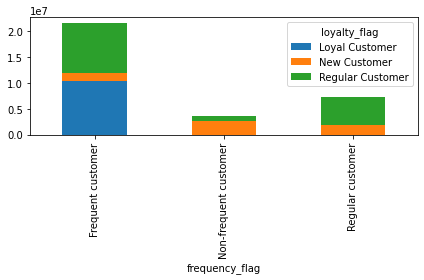

In [67]:
# Creating stacked bar chart - frequency_flag counts grouped by loyalty_flag

bar_5 = loyalty_and_spending_flags.plot(kind = 'bar', stacked = True)
plt.tight_layout()

In [68]:
# Exporting bar_5

bar_5.figure.savefig('loyalty_freq_flags.png')

In [69]:
# Creating crosstab between 'department_name' and 'loyalty_flag'

dept_name_loyalty_flag = pd.crosstab(ords_prods_custs_merged_3['department_name'], ords_prods_custs_merged_3['loyalty_flag'], dropna = False)

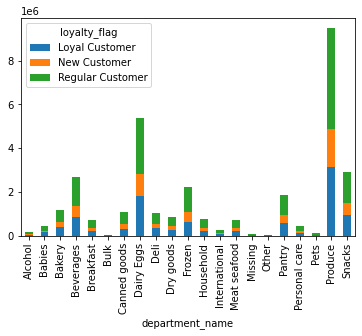

In [70]:
# Creating stacked bar chart - department_name counts by loyalty_flag

bar_6 = dept_name_loyalty_flag.plot(kind = 'bar', stacked = True)

In [71]:
# Exporting bar_6

bar_6.figure.savefig('dept_name_loyalty_flag.png')

In [72]:
dept_name_loyalty_flag.to_csv('dept_name_loyalty_flag.csv')




# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important

In [73]:
# Are there differences in ordering habits based on a customer’s region?

In [74]:
# Creating crosstab between 'department_name' and 'region' - index argument gives data proportions

dept_name_region = pd.crosstab(ords_prods_custs_merged_3['department_name'], ords_prods_custs_merged_3['region'], normalize='index')

In [75]:
# Checking crosstab results

dept_name_region

region,Midwest,Northeast,South,West
department_name,,,,
Alcohol,0.199114,0.172692,0.335884,0.292311
Babies,0.195329,0.177297,0.338965,0.288408
Bakery,0.194832,0.177921,0.331632,0.295615
Beverages,0.193804,0.179835,0.334412,0.291949
Breakfast,0.193716,0.175773,0.333201,0.297310
Bulk,0.197987,0.167819,0.333584,0.300610
Canned goods,0.195368,0.174855,0.333329,0.296448
Dairy Eggs,0.194982,0.176712,0.332849,0.295456
Deli,0.193888,0.177710,0.332385,0.296017


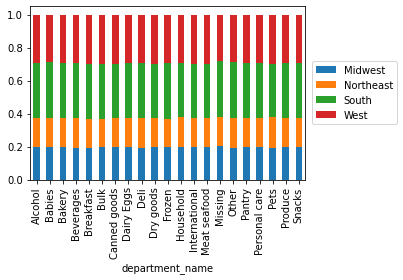

In [76]:
# Creating 100% stacked bar - department names by region

bar100 = dept_name_region.plot(kind='bar', stacked = True)
plt.legend(loc='right', bbox_to_anchor=(1.35, 0.50))
plt.tight_layout()

In [77]:
# Exporting bar100

bar100.figure.savefig('orders_by_region.png')

In [78]:
# Creating crosstab between 'department_name' and 'region' - index argument gives data proportions

weekday_region = pd.crosstab(ords_prods_custs_merged_3['weekday'], ords_prods_custs_merged_3['region'], dropna = False)

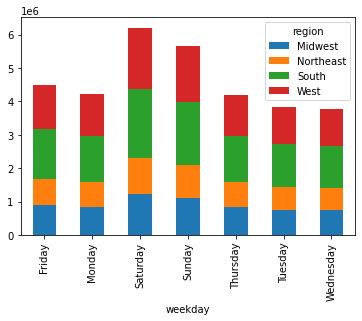

In [79]:
# Creating stacked bar - weekday by region

weekday_region_bar = weekday_region.plot(kind = 'bar', stacked = True)

In [80]:
# Exporting weekday_region_bar

weekday_region_bar.figure.savefig('weekday_region_bar.png')

# Is there a connection between age and family status in terms of ordering habits?

In [81]:
# Creating crosstab between 'department_name' and 'generation'

order_by_age = pd.crosstab(ords_prods_custs_merged_3['department_name'], ords_prods_custs_merged_3['generation'])

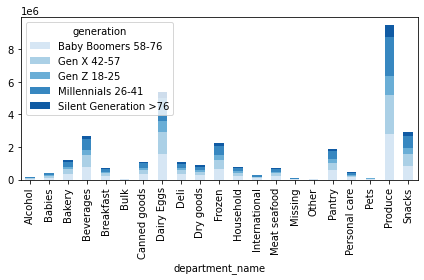

In [82]:
# Creating stacked bar - department_name by generation

bar_7 = order_by_age.plot(kind = 'bar', stacked = True, color = sns.color_palette('Blues', 5))
plt.legend
plt.tight_layout()

In [83]:
# Exporting bar7

bar_7.figure.savefig('orders_by_age_stack.png')

In [84]:
# Creating same crosstab but with values as proportions

order_by_age_2 = pd.crosstab(ords_prods_custs_merged_3['department_name'], ords_prods_custs_merged_3['generation'], normalize = 'index')

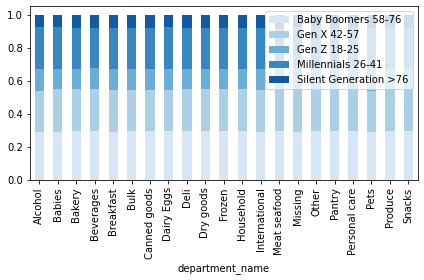

In [85]:
# Creating 100% stacked bar - department name by generation

bar100_2 = order_by_age_2.plot(kind='bar', stacked = True, color = sns.color_palette('Blues', 5))
plt.legend(loc='right', bbox_to_anchor=(1.0, 0.75))
plt.tight_layout()

In [86]:
# Exporting bar100_2

bar100_2.figure.savefig('orders_by_age_100stack.png')

In [87]:
# Creating crosstab between 'department_name' and 'fam_status'

order_by_fam = pd.crosstab(ords_prods_custs_merged_3['department_name'], ords_prods_custs_merged_3['fam_status'])

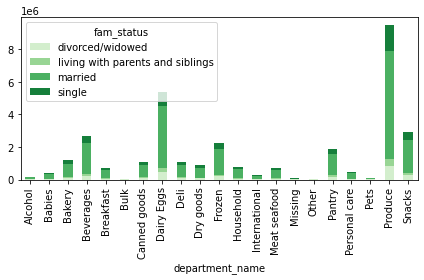

In [88]:
# Creating stacked bar - department_name by fam_status

bar_8 = order_by_fam.plot(kind = 'bar', stacked = True, color = sns.color_palette('Greens', 4))
plt.legend
plt.tight_layout()

In [89]:
# Exporting bar_8

bar_8.figure.savefig('orders_by_fam_status.png')

#What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

Text(0, 0.5, '')

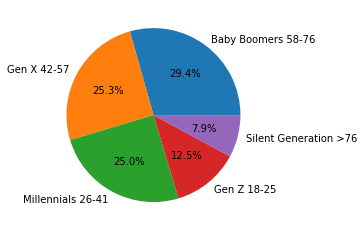

In [90]:
# Showing pie chart of customers based on generation

pie_3 = ords_prods_custs_merged_3['generation'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.ylabel('')

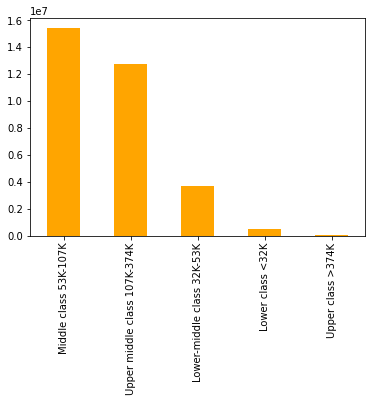

In [91]:
# Bar chart of income_group count

bar_9 = ords_prods_custs_merged_3['income_group'].value_counts().plot.bar(color = 'orange')

In [92]:
# Creating aggregation for total sales by fam_status

sales_by_fam_status = ords_prods_custs_merged_3.groupby('fam_status').agg({'prices' : ['sum']})

<function matplotlib.pyplot.legend>

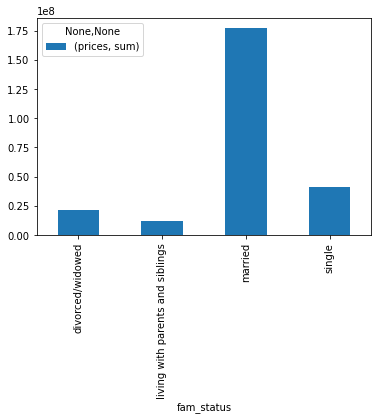

In [93]:
# Bar chart of total sales by fam_status

bar_10 = sales_by_fam_status.plot.bar()
plt.legend

In [94]:
# Exporting bar_10

bar_10.figure.savefig('sales_by_fam_status_bar.png')

# What differences can you find in ordering habits of different customer profiles? 

In [95]:
# Crosstab between order_hour_of_day and parent_status

parent_spender = pd.crosstab(ords_prods_custs_merged_3['order_hour_of_day'], ords_prods_custs_merged_3['parent_status'], dropna = False)

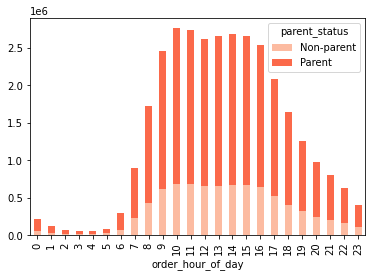

In [96]:
# Creating stacked bar chart - order_hour_of_day by parent_status

bar_11 = parent_spender.plot(kind = 'bar', stacked = True, color = sns.color_palette('Reds', 3))

In [97]:
bar_11.figure.savefig('order_hour_by_parent_status.png')

In [98]:
# Crosstab between generation and spender_flag

age_spender_type = pd.crosstab(ords_prods_custs_merged_3['generation'], ords_prods_custs_merged_3['spender_flag'], dropna = False)

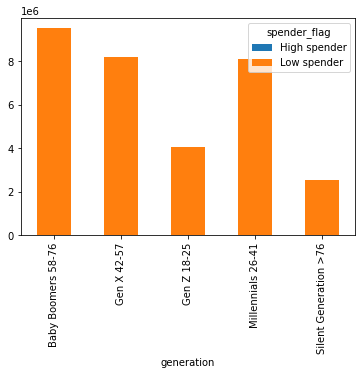

In [99]:
# Creating stacked bar chart - generation count by spender_flag

bar_12 = age_spender_type.plot(kind = 'bar', stacked = True)

In [100]:
bar_12.figure.savefig('generation_count_by_spender_flag.png')

In [102]:
ords_prods_custs_merged_3.to_csv('ords_prods_custs_merged_final.csv')